## The golden ratio and the Fibonacci sequence

Below we plot the Golden Rectangle.  The proportions of the smaller rectangle with sides 
a and b are "golden".  What makes them golden is that proportion of the lower rectangle,
constructed with sides a+b and b, are the same.


That is,

$$
\frac{b}{a} = \frac{b+a}{b}
$$


#### Useful references 

1. [Reich's discussion of Fibonacci numbers](https://math.temple.edu/~reich/Fib/fibo.html)
2. [Mathworld Wolfram on loarithmic spirals.](https://mathworld.wolfram.com/LogarithmicSpiral.html)
3. [Wikipedia spiral page.](https://en.wikipedia.org/wiki/Spiral)   See especially for definition of polar slope angle.
4. [Wikipedia Logarithmic Spiral page.](https://en.wikipedia.org/wiki/Logarithmic_spiral)
5. [Basic differential geometry definition definition of tangential angle](https://mathworld.wolfram.com/TangentialAngle.html)

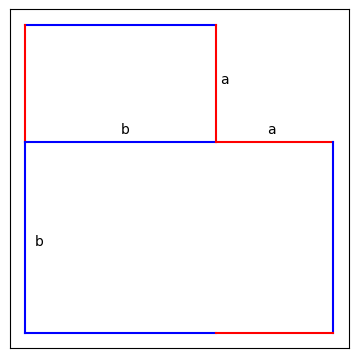

In [463]:
import numpy as np
from matplotlib import pyplot as plt

phi = 2* np.cos (np.pi/5)
a,b = 1,phi

fig, ax0 = plt.subplots(1,1,figsize=(4.4,4.4))

# side b lower
ax0.plot([0,b], [0,0],c="b")
#side b upper
ax0.plot([0,b], [a,a],c="b")
# side a left
ax0.plot([0,0], [0,a],c="r")
# side a right
ax0.plot([b,b], [0,a],c="r")

# Lower a extension
ax0.plot([b,b+a],[0,0],c="red")

#Lower b extensions
ax0.plot([0,0],[0,-b],c="b")
ax0.plot([b+a,b+a],[0,-b],c="b")

# Lower Parallels
# b part
ax0.plot([0,b], [-b,-b],c="b")
# a part
ax0.plot([b,b+a],[-b,-b],c="r")

ax0.set_aspect("equal")
ax0.set_xticks([],[])
ax0.set_yticks([],[])
ax0.annotate('b', xy=(b/2, .08))
ax0.annotate('b', xy=(.08, -.54*b))
ax0.annotate('a', xy=(b, a/2), xytext=(3, 0), textcoords="offset points")
_ = ax0.annotate('a', xy=(b+.4*a, .08), xytext=(3, 0), textcoords="offset points")

Letting $\phi$ be the proportion we seek ($\phi=b/a$), we can write:

$$
\phi = 1 + \frac{1}{\phi}
$$

The positive solution to the quadratic equation is

$$
\phi = \frac{1 + \sqrt{5}}{2}
$$

This number is the **Golden ratio** (yes, that's right, the god(desse)s of Math have decreed
that the Golden Ratio is irrational).  We compute its value (as best it can be computed) in the next cell.

In [464]:
phi = (1 + np.sqrt(5))/2
phi

1.618033988749895

A note:  Though we do not illustrate this in the diagram, the construction above is recursive, because the second rectangle is just as much a golden rectangle as the first.  Therefore we can repeat the construction and draw a third rectangle with sides 2b + a, b + a below the second.  That rectangle too will be golden.  And below that we can construct a fourth golden rectangle, and so on.  It's golden rectangles all the way down.

We never solved for $a$ and $b$ of course. But these conclusions are true for any rectangle with golden proportions.  So consider $a=1$ and $b=\phi$. Then the third rectangle's proportions must be golden as well
and that means

$$
\frac{2\phi + 1}{\phi + 1} = \phi
$$

And indeed

In [465]:
(2*phi + 1)/(phi + 1)

1.618033988749895

And so also for a rectangle with sides $3\phi+2$ and $2\phi +1$: as we keep growing the rectangle sides
the ratio remains constant.

##  Introducing the Fibonacci sequence

The Fibonacci sequence is sequence of integers which has a deep connection to the golden ratio $\phi$.  We'll demonstrate that in a moment.  First here is the sequence:

In [297]:
a,b = (1,1)

print(f"\n{a}",end=" ")

for i in range(20):
    print(f"{b}",end=" ")
    a,b = b, a+b
    
print("...")


1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 ...


Note that each term after the first `1 1` is the sum of the previous two terms.  The code snippet
just implements this simple idea, maintaining a pair consisting of the last two integers in the sequence which is used to construct the next pair.

The Fibonacci Sequence crops up in many places in nature, mathematics, and applied mathematics (of which
Computer Science is one large branch).  [Wikipedia](https://en.wikipedia.org/wiki/Fibonacci_sequence) tells us:

> Applications of Fibonacci numbers include computer algorithms such as the Fibonacci search technique and the Fibonacci heap data structure, and graphs called Fibonacci cubes used for interconnecting parallel and distributed systems. They also appear in biological settings, such as branching in trees, the arrangement of leaves on a stem, the fruit sprouts of a pineapple, the flowering of an artichoke, and the arrangement of a pine cone's bracts ...

And here is the first of many connections to  the Golden Ratio $\phi$:
At the limit, the ratio of successive terms in the Fibonacci sequence is $\phi$.
We demonstrate:

In [298]:
# Another way of computing phi is 2* np.cos (np.pi/5).  Explained below.
print(f"                       phi = {2* np.cos (np.pi/5)}",end="\n\n")
   

a,b = (1,1)
print("  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)")
print("-"*42)
for i in range(1,31):
    print(f"{i: >3d}  {a:>8d}  {b: 8d}      {b/a}")
    a,b = b, a+b

                       phi = 1.618033988749895

  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)
------------------------------------------
  1         1         1      1.0
  2         1         2      2.0
  3         2         3      1.5
  4         3         5      1.6666666666666667
  5         5         8      1.6
  6         8        13      1.625
  7        13        21      1.6153846153846154
  8        21        34      1.619047619047619
  9        34        55      1.6176470588235294
 10        55        89      1.6181818181818182
 11        89       144      1.6179775280898876
 12       144       233      1.6180555555555556
 13       233       377      1.6180257510729614
 14       377       610      1.6180371352785146
 15       610       987      1.618032786885246
 16       987      1597      1.618034447821682
 17      1597      2584      1.6180338134001253
 18      2584      4181      1.618034055727554
 19      4181      6765      1.6180339631667064
 20      6765     10946      

Below we'll sketch a demonstration of this wonder.  If tt doesn't exactly explain away the wonder,
it does at least show that it must be true.

The next cell contains Python code implementing a variety of ways to compute Fibonacci sequences,
including an iterative function, a recursive function, a Python generator (really a special kind
of iteration function), two matrix powers computations, and a closed form function (derived
from the matrix powers algorithm).  The last is the most efficient, but not by as much as
you might think.

What the variants demonstrate is the difference between three ideas: implementation, algorithm,
and function. An algorithm is a step-by-step recipe for computing something. Even though it
must be specific enough to be implementable, it may still leave out many details of how
the computation is done.  Arguably, there are only two algorithms in the code below, the 
summing of successive integer pairs we demonstrated above, and the closed form computation
that is the result of mathematical insight.  More precisely, the algorithm we presented is

$$
\begin{array}{ll}
\text{while} &\text{ctr} < n:\\
              &(a,\, b) \mapsto (b,\, a + b)\\
              &\text{ctr} += 1
\end{array}
$$

An implementation of an algorithm is a specific
embodiment in code.  Below we give iterative and recursive versions of the successive summing
algorithm for computing the nth Fibonacci number.  Then we give a Python generator version,
which is only a slight implementational variant of the iterative version, but that variant
can have huge memory usage advantages.  Then we move on to a matrix powers implementation
which involves taking the nth power of a matrix to compute the nth Fibonacci term.  That looks
very different but in fact each successive multiplication by the Fibonacci matrix just maps
$(a,\, b)$ to $(b,\, a + b)$ essentially the same algorithm.  We then present a variation
of the matrix powers idea which implements taking the nth power by diagonalizing the
Fibonacci matrix, allowing a significant speed-up because taking powers of diagonal
matrixes is much faster. Still the matrix multiplications involved  just
map successive values of $(a,\, b)$ to $(b,\, a + b)$. Finally the closed form 
computation is a genuine break.  It looks like this:

$$
\text{F}_{n} = \frac{1}{\sqrt{5}}(\phi^{n} - (1 - \phi)^{n})
$$

No successive mapping of pairs, no successive summing. And suddenly, magically,
$\phi$ appears in what is probably the most compelling illustration of the deep connection of $\phi$ 
and the Fibonacci sequence. And by the way, 
where did $\sqrt{5}$ come from? This is a different algorithm.  Conceptually,
it is a short step from the computation by diagonalized matrix (we sketch the step below), but
in that step everything has changed.  And computationally, the efficiency is an improvement.

Final distinction to be made. What's practical.  The closed form approach implemented
below is faster, consistently twice as fast on my MacBookPro 18,3 with an 8-core Apple M1 Pro
CPU.  However it does not get the right answer for large n.  For example, for $\text{F}_{100}$
we have

$$
\begin{array}{l|cc|cc}
                    &  \text{F}_{72}  & \Delta  &  \text{F}_{100} & \Delta \\
                    \hline
\text{Closed form}  & 498,454,011,879,265 &1 & 354,224,848,179,263,111,168 & 1,196,093\\
\text{Iterative} &  498,454,011,879,264  & \_  &  354,224,848,179,261,915,075 & \_
\end{array}
$$

At n= 72, the closed form function 
differs by 1 from the iterative function (which agrees with Google and WolframAlpha in its results);
by n =100, the difference is nearly 1.2 million. The details may vary on various
machines, but I'll note that Fabian Dablander (cited below) also cites major
issues around this value of n.  

The problems actually start at lower numbers.  The attentive code-reader will note
that the definition of `fibonacci_closed_form` wraps the expression
in the `int(...)` function before returning a value.  This is because the function 
would never return an integer value otherwise.  For example, here's the value returned for n=12
with no `int` wrapper

In [119]:
(phi**12 - neg_phi_inv**12)/np.sqrt(5)

144.00000000000006

The math is completely correct and completely accurate.  The problems start with the $\sqrt{5}$
in the definition of $\phi$, which is an irrational number that cannot be precisely represented
on a computer.  The minute you type `np.sqrt(5)` into Python you're dealing with an approximation. The problems then  mount up because floating point calculations generally inflate errors 
the more operations they require, and eventually, by the time you get to
$n=100$, you have an error of over 1 million, which sounds awful, but really isn't so bad when you 
consider you're computing a number over 350 quintillion. That's an error of about
$0.0000000000003\%$.

The moral: In the end practical considerations may trump everything, including the best
math and computer science.  The reason to be educated about programming is to know what
your options are.  For most conceivable purposes, an error of $0.0000000000003\%$ will
be no error at all and you can run with the faster alternative. However, if you
happen to be entered in a competitive computing tournament, it may be disastrous.  The good
old iterative algorithm we started with may well be the best option.  Other considerations
that may affect your choice: the amount of memory on your machine, 
the structure of your problem (for example,
whether your problem can be formulated in matrix form),
the real world usage context (are you putting this code on a server
with thousands of hits an hour, so that efficiency practically outweighs all
else?), whether parallelism can be deployed, and so on.

In [327]:
from matplotlib import pyplot as plt
import numpy as np
from functools import cache

def fibonacci_seq_n_iterative(n):
    """
    Return the nth Fibonacci number.
    
    Classic iterative definition of fibonacci sequence.
    """
    assert n > 0,"Use only positive n"
    a,b=(1, 1)
    #  This works on the corner cases n=0 n=1 because
    #  list(range(-1)) and list(range(0)) are both []
    #  (the right behavior if you think about
    #  the default values for the range parameters 
    #  start and step)
    for i in range(1,n):
        a,b = (b, a+b)
    return a


@cache
def fibonacci_seq_n (n):
    """
    Return the nth Fibonacci number.
    
    Classic recursive definition of fibonacci sequence.
    
    Decorator introduces caching.
    """
    assert n > 0,"Use only positive n"
    if n == 1:
        return 1
    elif n == 2:
        return 1
    else:
        return fibonacci_seq_n(n-2) + fibonacci_seq_n(n-1)
 
def fibonacci_seq_n_generator(n):
    """
    A generator that yields the Fibonacci sequence up to n or generates
    it an integer at a time.
    """
    assert n > 0,"Use only positive n"
    a,b=(1, 1)
    #  This works on the corner cases because
    #  list(range(-1)) and list(range(0)) are both []
    #  (the right behavior if you think about
    #  the default values for the range parameters 
    #  start and step)
    for i in range(n):
        yield a
        a,b = (b, a+b)
        
##########################################################################
#  Linear Algebra computation of Fib_n using powers of a matrix 
########################################################################

########################################################################
# Things to precompute
########################################################################

# Fib relation is a linear map
# (a b) |->  (b a+b)
# nth Fib num is a component of (Fib_m)^n applied to [1,1]
fib_M = np.array([[0,1],[1,1]])
init = np.array([0,1])

# fib_M eigen values are -1/phi, and phi 
# fib_M eigen vecs are unit vecs pointing in the direction
# of (1,phi) and (1,-1/phi) !
fib_evals, fib_evecs = np.linalg.eig(fib_M)
# Precompute the change of basis into the eigenspace
eigenspace_init = fib_evecs.T@init
evals_diag = np.diag(fib_evals)
# Some constants
phi = (1 + np.sqrt(5))/2
log_phi = np.log(phi)
phi_inv = phi -1
log_phi_inv = np.log(phi_inv)
neg_phi_inv = -phi_inv
## 
phi_10 = phi**(10)
phi_m10 = phi**(-10)

@cache
def fib_matrix_power(n):
    """
    Make this a function for caching
    """
    return np.linalg.matrix_power(fib_M,n)


def fibonacci_seq_n_matrix (n):
    # Fib relation is a linear map
    # (a b) |->  (b a+b)
    # Return a from the nth power of the corresponding matrix
    return (fib_matrix_power(n)@init)[0]

def fibonacci_seq_n_matrix_diag(n):
    """
    More efficient version of fibonacci_seq_n_matrix that uses
    diagonalized form of fib_M
    """
    #D= np.zeros((2,2))
    #D[[0,1],[0,1]] = fib_evals**n
    #return (fib_evecs@D@eigenspace_init)[0]
    #return (fib_evecs@np.linalg.matrix_power(evals_diag,n)@eigenspace_init)[0]
    return (fib_evecs@evals_diag**n@eigenspace_init)[0]
    #return (fib_evecs@np.diag(fib_evals**n)@eigenspace_init)[0]

def fibonacci_closed_form (n):
    """
    Reputation as the Fastest Fib_n computation.
    Another illustration of the close connection of phi and fib.
    Recall that -1/phi = 1 - phi, so neg_phi_inv is defined as 1-phi.
    """
    return int((phi**n - neg_phi_inv**n)/np.sqrt(5))


def fibonacci_closed_form_exp (n):
    """
    This actually has slightly greater accuracy problems for large n.  But is
    competitive efficiency wose.
    """
    return int(1/np.sqrt(5)*(np.exp(log_phi*n) - ((-1)**n) * np.exp(log_phi_inv*n)))

def fibonacci_closed_form_not_really_a_help (n):
    """
    Fastest Fib_n computation by far.
    Another illustration of the close connection of phi and fib.
    To relate to formula: Recall that -1/phi = 1 - phi.
    
    Note: For n>10 there seem to be some issues with high
    powers of floating point numbers. 
    """
    def fib_helper (phi_amt, phim_amt):
        return int((phi_amt - phim_amt)/np.sqrt(5))
    if n>10:
        (quo,rem) = divmod(n,10)
        phi_amt = (phi_10**quo)*(phi**rem)
        phim_amt = (phi_m10**quo)*(phi_inv**rem)
        return fib_helper (phi_amt, phim_amt)
    else:
        return int((phi**n - neg_phi_inv**n)/np.sqrt(5))

## Notes on the code above

After you've used it with a large value, or while debugging, it may be a good idea to do this
because of the `@cache` decorator in teh finction definition.
which saves whatever values it computes and does not need to do the 
full recursion the second time through a particular n.

In [720]:
fibonacci_seq_n.cache_clear()

Saves memory, or while debugging it flushes possibly incorrect values.

In [4]:
fibonacci_seq_n (12)

144

In [7]:
print(f"{fibonacci_closed_form (50):,}")

12,586,269,025


In [8]:
fibonacci_closed_form (50)

12586269025

In [9]:
for i in range(1, 13):
    print(i,fibonacci_seq_n_iterative(i))

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144


In [10]:
fibonacci_seq_n_iterative(50)

12586269025

In [11]:
fibonacci_seq_n(50)

12586269025

In [14]:
fibonacci_closed_form_float_issues(50)

12586269025

####  Generator version

In [776]:
g = fibonacci_seq_n_generator(12)

In [777]:
next(g)

1

In [778]:
list(fibonacci_seq_n_generator(12))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

In [4]:
g = fibonacci_seq_n_generator(12)
print(list(g))
# this produces an error
next(g)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


StopIteration: 

In [780]:
for x in fibonacci_seq_n_generator(12):
    print(x)

1
1
2
3
5
8
13
21
34
55
89
144


## Timing results for the various Fibonacci n-functions

There are some surprises awaiting.  Be aware.  Your mielage may vary.  All I can say is this is what happened on my Mac.

In [861]:
#  Default timing strategy
import time

# Dont forget to do this or this puppy will win every time
fibonacci_seq_n.cache_clear()

ctr,t1,iters = 0,time.perf_counter(),100
n=100
while ctr < iters:
    # f(50) = 12,586,269,025
    # f(100) = 354,224,848,179,261,915,075 (per google)
    fn2 = fibonacci_seq_n (n)
    ctr += 1
elapsed2 = timer.timeit(iters)
print(f"{(time.perf_counter()-t1):.3e} seconds")
#print(f"{fn2:,}")

2.765e-04 seconds


Said to be better for small chunks of code.  We'll use it here.

In [869]:
import timeit
n,iters = 200,1000

fibonacci_seq_n.cache_clear()
# Recursive implementation, almost always the fastest, go figure
timer = timeit.Timer(lambda: fibonacci_seq_n(n))
elapsed3 = timer.timeit(iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.000258 seconds


In [870]:
import timeit
n,iters = 200,1000


# Iterative implementation
timer = timeit.Timer(lambda: fibonacci_seq_n_iterative(n))
elapsed3 = timer.timeit(iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.019375 seconds


In [871]:
import timeit
n,iters = 200,1000

# Matrix implementation plain matrix powers calculation
timer = timeit.Timer(lambda: fibonacci_seq_n_matrix(n))
elapsed4 = timer.timeit(iters)
print(f'Time taken: {elapsed4:.6f} seconds')

Time taken: 0.004295 seconds


In [872]:
import timeit
n,iters = 200,1000

# Matrix implementation with diagonalization, eigen computations precomputed (surprisingly bad)
timer = timeit.Timer(lambda: fibonacci_seq_n_matrix_diag(n))
elapsed4 = timer.timeit(iters)
print(f'Time taken: {elapsed4:.6f} seconds')

Time taken: 0.011387 seconds


In [873]:

import timeit
n,iters = 200,1000

# The best closed form variant with issues discussed above
# Surpisingly NOT the fastest
timer = timeit.Timer(lambda: fibonacci_closed_form(n))
elapsed22 = timer.timeit(iters)
print(f'Time taken: {elapsed22:.6f} seconds')

Time taken: 0.004699 seconds


In [874]:
import timeit
n,iters = 200,1000

# A closed form variant using exp for exponentiation
timer = timeit.Timer(lambda: fibonacci_closed_form_exp(n))
elapsed23 = timer.timeit(iters)
print(f'Time taken: {elapsed23:.6f} seconds')

Time taken: 0.008441 seconds


## Accuracy results for closed form function

Restating what was said in the introduction:  The closed form computation is inaccurate
for larger values of n; all the others using some sort of iteration of addition on integers are accurate.

Here's the code to test your own version

In [875]:
for n in range(20,99):
    v1 = fibonacci_closed_form_float_issues(n) 
    v2 = fibonacci_seq_n (n)
    if (v1 != v2):
        print(f"{n}")
        print(f"Closed form: {v1:,}")
        print(f"Accurate:    {v2:,}")
        break

72
Closed form: 498,454,011,879,265
Accurate:    498,454,011,879,264


In [876]:
n=100
v1 = fibonacci_closed_form_float_issues(n) 
v2 = fibonacci_seq_n (n)
print(f"{n}")
print(f"Closed form: {v1:,}")
print(f"Accurate     {v2:,}")

100
Closed form: 354,224,848,179,263,111,168
Accurate     354,224,848,179,261,915,075


## The matrix calculation of Fibonacci numbers

We implement the idea that the Fibonacci update on a vector of two integers is a Linear Map with an associated matrix.  This matrix powers approach to computing is discussed in a number of places.  I first saw it in 
[Fabian Dablander's blog post}.](https://fabiandablander.com/r/Fibonacci.html) 

Here's a quick demo.  We'll show how we chose the matrix `fib_M` below.

In [782]:
fib_M = np.array([[0,1],
                  [1,1]])

$\text{F}_n$ is found by applying `fib_M` repeatedly to an initial Fibonacci pair vector.

In [783]:
init = np.array([0,1])
vec = init

We now calculate $\text{F}_{12}$ which rerquires calculating all $\text{F}_{n}$ up through $\text{F}_{12}$:

In [784]:
for i in range(12):
    vec = fib_M@vec
    print(f"{vec[0]: >3}")

  1
  1
  2
  3
  5
  8
 13
 21
 34
 55
 89
144


So finding the 12th Fibonacci number amounts to taking the matrix product of `fib_M`${}^{12}$ with
$\left (\begin{array}{c}0\\1\end{array}\right )$:


In [785]:
init = np.array([0,1])
np.linalg.matrix_power(fib_M,12)@init

array([144, 233])

How we get to this: The linear transformation for the Fibonacci Sequence is

$$
T \left ( \begin{array}{c} a\\b \end{array} \right ) =  \left ( \begin{array}{c} b\\ a + b \end{array} \right )
$$

It follows that (see Dablander's blog for a detailed proof) that

$$
 T ^{n}\left ( \begin{array}{c} 0\\1 \end{array} \right ) =
 \left ( \begin{array}{c} \text{F}_{n}\\ \text{F}_{n+1} \end{array} \right ).
$$


We define the two columns of the matrix for T,
which we'll call `fib_M`, by looking at the values of T `(0,1)` and `(1,0)`.  

In [509]:
# Col 1 of fib_M. The result dictated by the definition of T
fib_M@(np.array([1,0]))

array([0, 1])

In [786]:
#Col 2 of fib_M
fib_M@(np.array([0,1]))

array([1, 1])

Since $\text{M}\left ( \begin{array}{c} 1\\ 0\end{array}\right )$ is the first column of
$\text{M}$  and $\text{M}\left ( \begin{array}{c} 0\\ 1\end{array}\right )$ is the second, for any
matrix M, `fib_M` is:

$$
\left \lbrack
\begin{array}{c}
0 & 1\\
1 & 1
\end{array}
\right \rbrack
$$

So Fibonacci calculations become

$$
\left (
\begin{array}{c}
\text{F}_{n}\\
\text{F}_{n=1}\\
\end{array}
\right )
=
\left (
\left \lbrack
\begin{array}{c}
0 & 1\\
1 & 1
\end{array}
\right \rbrack
\right)^{n}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right )
$$

The next step up the efficiency ladder (one would think) is to use the diagonalized version of the Fibonacci Matrix because  the nth power of a diagonal matrix is particularly easy to compute

$$
\left\lbrack
\begin{array}{cc}
a  & 0 \\
0  & b
\end{array}
\right\rbrack ^{n} 
=
\left\lbrack
\begin{array}{cc}
a^n  & 0 \\
0  & b^n
\end{array}
\right\rbrack
$$

We get to the diagonal form of a matrix by factoring it into three other matrices,
one of which is diagonal; it turns out that, in this factored form, computing the nth power of the original matrix 
is equivalent to just taking the nth power of the diagonal matrix.
Schematically, this works as follows:

$$
\begin{array}{llcl}
&
\left\lbrack
\begin{array}{cc}
1 & 1 \\
1  & 0
\end{array}
\right\rbrack &= &
\text{E}
\left\lbrack
\begin{array}{cc}
\lambda_{1} & 0 \\
0  & \lambda_{2}
\end{array}
\right\rbrack
\text{E}^{-1}\\
&
\left\lbrack
\begin{array}{cc}
1 & 1 \\
1  & 0
\end{array}
\right\rbrack^{n} &=&
\text{E}
\left\lbrack
\begin{array}{cc}
\lambda_{1}^{n} & 0 \\
0  & \lambda_{2}^{n}
\end{array}
\right\rbrack
\text{E}^{-1}
\end{array}
$$

The factoring on the first line is called the **Singular Value Decomposition**  (SVD) of the matrix.
The singular values are the $\lambda$s in the diagonal matrix.  They are also
called **eigenvalues** of M, the matrix we're decomposing.  A full description of the idea takes up much of a Linear Algebra text, but essentially what we're doing is a change of coordinates or a change of axes to  certain
vectors associated with M called its **eigenvectors**.  Reading from right to left, the three matrices in the decomposition work as follows: the first changes basis to eigenvector coordinates (that's $\text{E}^{-1}$),; 
the second dilates in the directions of the  new axes (that's  the diagonal matrix); the third changes back from the eigenvector basis to the standard basis (that's $\text{E}$).

Why are we doing this again?  Well there are actually many applications of this decomposition,
but for our purposes, the point is the second line. If D is the diagonal matrix,it's easy to show that
$M^{n}$ is $\text{E}D^{n}\text{E}^{-1}$.    Applying this to the task of computing the nth Fiboncci number,
using the `Fib_m` matrix, we get:

$$
\begin{array}{llcl}
(1) &
\left (
\begin{array}{c}
\text{F}_{n}\\
\text{F}_{n=1}\\
\end{array}
\right )
&=&
\left (
\left \lbrack
\begin{array}{c}
0 & 1\\
1 & 1
\end{array}
\right \rbrack
\right)^{n}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right ) \\
& & = &
\text{E}
\left\lbrack
\begin{array}{cc}
\lambda_{1}^{n} & 0 \\
0  & \lambda_{2}^{n}
\end{array}
\right\rbrack
\text{E}^{-1}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right )
\\
\end{array}
$$

So with one change of basis and one inverse change 
of basis, finding the nth Fibonacci number becomes very easy.

But it's actually much better than that.  Because this matrix  computation leads to a closed form solution to the problem of computing the nth Fibonacci number ($\text{F}_{n}$).  No more recursion or iteration needed.  We have defined a function using the closed form definition (`fibonacci_closed_form`) along with other 
ways of computing the nth Fibonacci number in a code cell above.   The derivation of this form is given in the appendix, but the elements of the derivation have already been given.  If you know some Linear Algebra, you may want to try working out the details on your own. Use equation (1). You will need to find the eigenvalues and eigenvectors of `Fib_M` (because the diagonal matrix contains the eigenvalues and E contains the eigenvectors), and use E to find $\text{E}^{-1}$.  The hardest part is finding  $\text{E}^{-1}$, since you will lose an important numerical relationship if you just call `numpy.linalg.inv`. Instead you will have to use the formula for inverses from a Linear Textbook. If

$$
\text{E} = \left\lbrack 
\begin{array}{cc}
a & b \\
c  & d
\end{array}
\right \rbrack
$$

then
$$
\text{E}^{-1} = 
\frac{1}{\Delta}
\left\lbrack 
\begin{array}{cc}
d & -b \\
-c & a
\end{array}
\right\rbrack,
$$

where $\Delta$ is the determinant of E, $ad - bc$.

You can check your results by
looking at `fibonacci_closed_form` in the code cell above.

Let's close this discussion by  sketching the proof of something we noted 
above that the ratio $\text{F}_{n+1}/\text{F}_{n}$ converges
on $\phi$.

First, if we use standard methods to compute the eigenvalues of `fib_M` (see
Fabian's blog for the steps), we discover they are 

$$
\lambda_{1} = \frac{1 + \sqrt{5}}{2} \text{ and } \lambda_{2} = \frac{1 - \sqrt{5}}{2}
$$

and  one of these, of course, is our old friends $\phi$ and the other is $1 - \phi$,
which also $-\phi^{-1}$ (recall that $\phi = 1 + \phi^{-1}$).
This is fairly astonishing if you stop to think about it.  

It's also useful.  Using this first eigenvalue we can find the first eigenvector
and that will help us prove that the ratio of the terms in the Fibonacci
Sequence approaches $\phi$.

To find the eigenvector 

$$
\left(
\begin{array}{c}
a\\
b
\end{array}
\right )
$$

corresponding to eigenvalue $\phi$ of `fib_M`, we start with the following:

$$
\left\lbrack
\begin{array}{cc}
0 & 1 \\
1  & 1
\end{array}
\right\rbrack 
\left(
\begin{array}{c}
a\\
b
\end{array}
\right )
=
\left(
\begin{array}{c}
\phi \, a\\
\phi \, b
\end{array}
\right )
$$
since by definition an eigenvector of `fib_M`
with eigenvalue $\phi$
is a vector whose direction is unchanged by multiplication
with `fib_M`, but which is dilated or shrunk by a factor
of $\phi$.

We only need to consider the computation of the first component $\phi\,a$:
From the definition of matrix multiplication we know

$$
\begin{array}{lcl}
\phi a & = & b \\
\end{array}
$$

Hence, the ratio of $b$ to $a$ must be $\phi$,
so the eigenvectors for this eigenvalue must all be scalar multiples of 

$$
\left (
\begin{array}{c}
1\\
\phi 
\end{array}
\right ).
$$

Now the fact that the first eigenvector has the form

$$
\left(
\begin{array}{cc}
1\\
\phi \\
\end{array}
\right )
$$

leads directly to the conclusion
that the ratio of $\text{Fib}_{n+1}$ to $\text{Fib}_{n}$  converges to $\phi$.

The key connection is provided by a Linear Algebra theorem about matrix powers which says that for any square matrix M with first (or dominant) eigenvector $e_{1}$ and any arbitrary vector $v$,  

$$
\begin{array}{c}
\text{Powers Theorem}\\
\lim_{n\to \infty} \text{M}^{n}v = ke_{1},
\end{array}
$$

where $e_{1}$ is the first eigenvector (paired with the eigenvalue of largest magnitude) and $k$ is a scalar. That is, for large powers of $n$, $\text{M}^{n}v$ approaches the first eigenvector.
This is the basis for the powers method of computing the first eigenvector of
a matrix.  The proof is quite simple and is sketched out in an Appendix to this notebook.

Applying this to our matrix, `fib_M` and our initial Fibonacci vector 

$\left (
\begin{array}{c}
0\\
1
\end{array}
\right )$,
we have 

$$
\begin{array}{lcl}
\text{fib_M}^{n}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right ) &=&
\left (
\begin{array}{l}
\text{F}_{n}\\
\text{F}_{n+1}
\end{array}
\right )\\
%\begin{array}{l}
%\lim_{n\to \infty}
\lim\limits_{n \to \infty}
\text{fib_M}^{n}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right ) & = &
k\left (
\begin{array}{c}
1\\
\phi
\end{array}
\right )\\
%\lim_{n\to \infty} 
\lim\limits_{n \to \infty}
%\text{fib_M}^{n}
%\left (
%\begin{array}{c}
%0\\
%1
%\end{array}
%\right )
\left (
\begin{array}{l}
\text{F}_{n}\\
\text{F}_{n+1}
\end{array}
\right )
&=& k\left (
\begin{array}{c}
1\\
\phi
\end{array}
\right )
\end{array}
$$

so if  (1,$\phi$) is the first eigenvector, then the limit of the ratio $\text{F}_{n+1}/\text{F}_{n}$
must be $\phi$.  

This is as good a time as any to say that I heartily endorse what blogger Fabian says: If you want a better understanding of what eigenvectors are, see [3blue1brown's video on eigenvectors.](https://www.3blue1brown.com/lessons/eigenvalues)

## Exercise

### Introduction

As we just saw, $\phi$ is the $x$ such that $x = 1 + 1/x$.  That is,

$$
(1)\, \phi^{1} = \phi^{0} + \phi^{-1}.
$$

From this it follows that for any $n$ (including negative or irrational $n$):

$$
(2)\, \phi^{n} = \phi^{n-1} + \phi^{n - 2}
$$

For any particular $n$,we derive the version of (2) that has $\phi^{n}$ on the
left hand side simply by multiplying both sides of (1) by $\phi^{n-1}$.
For example, if $n=3$, we multiply both sides of (1) by $\phi^{2}$ to get:

$$
\phi^{3} = \phi^{2} + \phi^{1}
$$


What (2) tells us, then, is that taking a power of $\phi$ may be reduced to addition:

The first function in the cell below takes advantage of this
relation to define an iterative function that computes 
positive integer powers of $\phi$.

For any non-negative integer `n`, `phi_pow_iterative(n)`
returns exactly the same result as $\phi^n$ or in Python
`phi**n`.

In [879]:
def phi_pow_iterative(n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only nonnegative n"
    if n == 0:
        return 1
    elif n == 1:
        return phi
    else:
        #  Keep around the last two terms
        #  because you're going to add them to get
        #  the next one
        res = [1,phi]
        for i in range (n-1):
            res = [res[1], res[0]+res[1]]
            #res = res[1:] + [sum(res)]
        return res[1]
    


To check our claim that for any non-negative integer `n`, `phi_pow_iterative(n)` 
returns exactly the same result as $\phi^n$, let's try `n=12`:

In [881]:
# phi is a name defined earlier in the notebook and which should be defoned when youi
# do this exercise.
phi**12

321.996894379985

And our phi functions return:

In [882]:
phi_pow_iterative(12)

321.99689437998484

Demonstrations of what's discussed below:

In [888]:
phi**(3),2*phi+1

(4.23606797749979, 4.23606797749979)

In [892]:
phi**(4), 3*phi+2

(6.854101966249686, 6.854101966249685)

In [894]:
phi**(5),5*phi+3

(11.090169943749476, 11.090169943749475)

###  What to do

Your assignment  is to write two functions. 

1.  First, write a recursive version 
of `phi_pow_iterative(n)`. Call it `phi_pow_recursive(n)`.  You should consult  `phi_pow_iterative(n)` to help
you decide how to formulate it, and you might also find it useful
to look at `fibonacci_seq_n`  defined earlier in the notebook. That
is a recursive definition of `fibonacci_seq_n_iterative`.

2.  Write another function (call it `phi_pow`) that for any $n$, returns the same value
as  `phi_pow_iterative(n)` and `phi_pow_recursive(n)` but is neither iterative nor
recursive.  Instead your function  should take advantage of the following
regularity:

    $$
\begin{array}{lclclcrl}
\phi^1 & &                &  &                    &=& \phi\\
\phi^2& &                 &  &                    &=&  \, \phi + 1 \\
\phi^3 &=& \phi^2 +\phi  &=& (\phi + 1) + \phi &=& 2\,\phi + 1\\
\phi^4 &=& \phi^3 + \phi^2 && & =& 3\,\phi + 2 &\\
\phi^5 &=& \phi^4 + \phi^3 && &= & 5\,\phi + 3 &\\
\end{array}
    $$

    That is, for any positive integer `n`, $\phi^{n}$ can be expressed in the form

    $$
\phi^{n} = j\phi  + k
    $$

    where `j` and `k` are  positive integers depending on `n`.  For example, when `n` is 5, `j` is 5 and `k` is 3.  The examples shown above should make it clear that when `n` is 6, `j` is 8 and `k` is 5.

1. Your function `phi_pow(n)` should return the same value as  $\phi^{n}$, but you should at least test it for `n=1` `n=2` and `n=12`.  
2. I am going to test your function on some unknown higher value of `n`, so you won't get full credit for simply precomputing the values `i` and `j` necessary for `n=1,n=2, ... n=12`. In fact, if you do that, you won't get any credit.
2.  Your answer shouldn't call `phi_pow_iterative(n)` or `phi_pow_recursive(n)` and it shouldn't incorporate any code from those functions or any functions you import from another module. A good rule of thumb: if you follow the hints in the instructions,  computing `phi_pow(12)` shouldn't involve computing `phi_pow(11)` or `phi_pow(10)`.
3.  **Hint**  A function defined elsewhere in this notebook may be of use, although you will get full credit if you compute $i$ and $j$ with your own code.

In [735]:

def phi_pow_recursive(n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only nonnegative n"
    if n == 0:
        return 1
    elif n == 1:
        return phi
    else:
        return phi_pow_recursive(n-2) + phi_pow_recursive(n-1)

    
def phi_pow (n):
    """
    Non-iterative implementation of phi**n using the recurrence relation
    
    phi^n = phi^{n-2}  + phi^{n-1}
    
    For example 
    
    phi**2                                   =   phi + 1
    phi**3 = phi + phi**2  = phi + (phi + 1) = 2*phi + 1
    phi**4 = phi**2 + phi**3                 = 3*phi + 2 (add the two expressions above)
    phi**5 = phi**3 + phi**4                 = 5*phi + 3 (add the two expressions above)
    ....
    phi**n = Fib_{n-1} * phi + Fib_{n-2}
    
    where Fib_i is the ith term in the Fib sequence
    """
    if n == 0:
        return 1
    elif n== 1:
        return phi
    else:
        #  Note phi_pow isnt recursive because it  doesnt call phi_pow
        #  Rather phi_pow has been reduced to a computation involving
        #  fibonacci_seq_n. Multiplication (taking a power)  has been reduced to addition.
        return fibonacci_seq_n(n)*phi + fibonacci_seq_n(n-1) 

## Appendix

    ### Deriving the Closed form computation of Fibonacci numbers

### Deriving the closed form (See [Fabian Dablander's blog](https://fabiandablander.com/r/Fibonacci.html) )

To derive a closed form for $\text{Fib}_{n}$, we must spell out the change of basis 
matrixes $\text{E}$ and $\text{E}^{-1}$ used in (1).
Start with E, which must map from the eigenvector basis
to the standard basis.  To find the matrix expressing the linear map, 
we  ask  what does E map  $\left ( \begin{array}{c} 1 \\ 0\end{array} \right )$
and $\left ( \begin{array}{c} 0 \\ 1\end{array} \right )$ to?
Since the basis we are changing to is the eigenvector basis,
the linear combinations encoded by coordinates $\left ( \begin{array}{c} 1 \\ 0\end{array} \right )$   and $\left ( \begin{array}{c} 0 \\ 1\end{array} \right )$  are

$$
\begin{array}{lcl}
1 \cdot e_{1} + 0\cdot e{2}
& = & e_{1}\\
0 \cdot e_{1} + 1 \cdot e_{2} & = & e_{2}
\end{array},
$$

where $e_{1}$ and $e_{2}$ are the first and second eigenvectors; so to specify E we know we need both eigenvectors.
We found the first eigenvector above.

Using the same method for the second eigenvalue, we get

$$
\begin{array}{lcl}
(-\phi^{-1}) \,a & = & b
\end{array}
$$

The first equation tells us that in this case the ratio of $b$ to $a$ must be $-\phi^{-1}$,
so the eigenvectors for this eigenvalue must all be scalar multiples of 

$$
\left (
\begin{array}{c}
1\\
-\phi^{-1} 
\end{array}
\right )
$$

So now we know

$$
\begin{array}{llcl}
\text{E}:& \left ( \begin{array}{c} 1 \\ 0\end{array} \right ) &\mapsto &
\left ( \begin{array}{c}1\\ \phi \end{array} \right )\\
\text{E}: & \left ( \begin{array}{c} 0 \\ 1\end{array} \right ) & \mapsto &
\left ( \begin{array}{c} 1\\-\phi^{-1} \end{array} \right )
\end{array}
$$

The only matrix that does this is 
$$
\text{E} =
\left\lbrack
\begin{array}{cc}
1 & 1 \\
\phi & -\phi^{-1}
\end{array}
\right\rbrack
$$

To use the diagonal matrix, we also need $\text{E}^{-1}$, the matrix that maps from standard basis coordinates to
coordinates in the eigenvector basis.  Not every matrix has an inverse but a valid change of basis matrix will, and
when the matrix exists, we can use 
the standard Linear Algebra formula cited above to find it;

$$
\text{E} = \left\lbrack 
\begin{array}{cc}
a & b \\
c  & d
\end{array}
\right \rbrack
$$

implies 

$$
\text{E}^{-1} = 
\frac{1}{\Delta}
\left\lbrack 
\begin{array}{cc}
d & -b \\
-c & a
\end{array}
\right\rbrack,
$$

where $\Delta$ is the determinant of E, $ad - bc$.


Applying this to E, we have:


$$
\text{E}^{-1} =
\frac{-1}{\sqrt{5}}
\left\lbrack
\begin{array}{cc}
-\phi^{-1} & - 1\\
-\phi & 1
\end{array}
\right\rbrack
$$

That is, the determinant $\Delta$ of $\text{E}$, $ad - bc$, is $- \sqrt{5}$.  Working through that:


$$
ad-bc = \lbrack 1\cdot(-\phi^{-1}) \rbrack - \lbrack1\cdot \phi \rbrack = (1 - \phi) - \phi = (1 - 2\phi),
$$

since $-\phi^{-1} = (1 - \phi)$.

Recalling that

$$
\phi = \frac{1 + \sqrt{5}}{2}
$$


we have

$$
\begin{array}{lcl}
1 - 2\phi  &=& 1 - 2 \frac{1 + \sqrt{5}}{2}\\
               &=& \frac{2 - 2 -2 \sqrt{5}}{2}\\
               &=& - \sqrt{5}
               \end{array}
$$

You can also do this step by finding the inverse in Python:

In [102]:
E = np.array([[1,           1],
              [phi, -phi**(-1)]])
((a,b),(c,d))= E
E_inv =np.linalg.inv(E)
E_inv

array([[ 0.2763932,  0.4472136],
       [ 0.7236068, -0.4472136]])

But then you have to multiply $\Delta$ (the determinant, $=-\sqrt{5}$) back in to 
let you see that $\phi$, $-\phi^{-1}$,-1, and 1 are all in there, which
is what lets the simplifications go forward.

In [117]:
E_inv* (np.linalg.det(E))

array([[-0.61803399, -1.        ],
       [-1.61803399,  1.        ]])

In [111]:
np.array([[d, -b], [-c,  a]])

array([[-0.61803399, -1.        ],
       [-1.61803399,  1.        ]])

And it's okay to use  `np.linalg.det(E)` for $\Delta$, without ever calling it $-\sqrt{5}$.

In [105]:
np.linalg.det(E),-np.sqrt(5)

(-2.23606797749979, -2.23606797749979)

We can now use  (1) to write an expression for
the nth Fibonacci vector:

$$
\begin{array}{lclccc}
\left(
\begin{array}{c}
\text{F}_{n}\\
\text{F}_{n+1}
\end{array}
\right )
& = &
\left (
\left\lbrack
\begin{array}{cc}
1 & 1 \\
1  & 0
\end{array}
\right\rbrack
\right )^{n} 
\left(
\begin{array}{c}
0\\
1
\end{array}
\right ) \\  %%%%  Begin second line
&=&
\left\lbrack
\begin{array}{cc}
1 & 1 \\
\phi & -\phi^{-1}
\end{array}
\right\rbrack
\left\lbrack
\begin{array}{cc}
\phi^{n} & 0 \\
0 & (-\phi^{-1})^{n}
\end{array}
\right\rbrack
\left(
\frac{-1}{\sqrt{5}}
\left\lbrack
\begin{array}{cc}
-\phi^{-1} & -1\\
-\phi & 1
\end{array}
\right\rbrack
\right )
\left(
\begin{array}{c}
0\\
1
\end{array}
\right )  \\  %%%% Begin third line
& = &
-\frac{1}{\sqrt{5}}
\left\lbrack
\begin{array}{cc}
\phi^{n} & (-\phi^{-1})^{n}\\
\phi^{n+1} & (-\phi^{-1})^{n+1}
\end{array}
\right \rbrack
\left (
\begin{array}{c}
-1\\
1
\end{array}
\right )  \\  %%%% Begin fourth line
& = &
\frac{1}{\sqrt{5}}
\left (
\begin{array}{c}
\phi^{n} - (-\phi^{-1})^{n}\\
\phi^{n+1} - (-\phi^{-1})^{n+1}
\end{array}
\right )
\end{array}
$$

From which we see the closed form for $\text{F}_{n}$:

$$
\text{F}_{n} = \frac{1}{\sqrt{5}}(\phi^{n} - (-\phi^{-1})^{n})
$$

It's clear that the second term goes to 0 as $n$ gets large, so for large
$n$,

$$
\text{F}_{n} \approx \frac{1}{\sqrt{5}}\phi^{n},
$$

which leads to another proof that the
ratio of adjacent Fibonacci numbers has $\phi$ as a limit (also cited
in Fabian's blog, as Kepler's proof).  For large $n$:

$$
\frac{\text{F}_{n+1}}{F_{n}} = \frac{\frac{1}{\sqrt{5}}\phi^{n+1}}{\frac{1}{\sqrt{5}}\phi^{n}}
= \frac{\phi^{n+1}}{\phi^{n}} = \phi
$$

##  An informal derivation of the closed form of $\text{F}_{n}$

Above  we followed blogger Fabian's steps in deriving the closed form of the nth Fibonacci
number.  That proof was quite elegant and used eigenvectors of the Fibonacci matrix.  That's
Linear Algebra, which is not generally considered lofty mathematics, but it's more
than a lot of people have had.  Here I'd like to present an alternative "derivation".
Unlike the Linear Algebra derivation it's only valid for large $n$, but it offers
some insight, because it shows the relationship of the closed form to the odd fact
that $\phi^{n}$ has a Fibonacci-like structure ($\phi^{n}$ is the sum of the 
$\phi^{n-1}$ and $\phi^{n-2}$).  It also introduces the number $\sqrt{5}$ in a fairly
transparent way.  In the Linear Algebra derivation, $\sqrt{5}$ makes its appearance
as the determinant of the change of basis matrix E, but like almost all facts involving
determinants, that falls somewhat short of being intutitive.

From the original definition of $\phi$
and the fact that $\phi = 1 + 1/\phi$, we have:

$$
\begin{array}{lcl}
    \mathbf{Fact} \,\mathbf{A}& &\\
\sqrt{5} = \phi + \frac{1}{\phi}
\end{array}
$$

Fact A follows directly from the original definition of $\phi$
and the fact that $\phi = 1 + 1/\phi$:

$$
\begin{array}{lcl}
\phi &=& \frac{1+\sqrt{5}}{2}\\
\sqrt{5} &=& 2\phi -1\\
        & =& \phi + (\phi - 1)\\
        & =& \phi + \frac{1}{\phi}\\
\end{array}
$$

Based also on the fact that $\phi = 1 + 1/\phi$,
or more usefully for present purposes,  $\phi^1 = \phi^0 + \phi^{-1}$, we have  this general Fibonacci-like relation among powers of $\phi$:

$$
\begin{array}{llcl}
(a) & \phi^1 = \phi^0 + \phi^{-1}\\
(b) & \phi^n = \phi^{n-1} + \phi^{n-2}\\
\end{array}
$$

where (b) is (a) multiplied by $\phi^{n-1}$.

Now we can reformulate this to actually use Fibbonacci numbers 
to compute powers of $\phi$ (not recommended for
the computationally conscientious):

   $$
\begin{array}{lclclcrl}
\phi^1 & &                &  &                    &=& \phi\\
\phi^2&= &  \phi^1 +\phi^0               &  &                    &=&  \, \phi + 1 \\
\phi^3 &=& \phi^2 +\phi  &=& (\phi + 1) + \phi &=& 2\,\phi + 1\\
\phi^4 &=& \phi^3 + \phi^2 && & =& 3\,\phi + 2 &\\
\phi^5 &=& \phi^4 + \phi^3 && &= & 5\,\phi + 3 &\\
\end{array}
    $$
   
In each case the expression on the right contains
Fibonacci coefficients and is computed by summing the two expressions above it.  That is, for any positive integer `n`, $\phi^{n}$ can be expressed in the form

$$
\begin{array}{lcl}
\mathbf{Fact} \,\mathbf{B}& &\\
\phi^{n}  = F_{n}\phi + F_{n-1},
\end{array}
$$

where $F_{n}$ is the nth Fibonacci number.  Now we examine a similar pattern for negative powers of
$\phi$:

 $$
\begin{array}{lclclcrr}
\phi^{1}  &=&                                       & &                    & & \phi\\
\phi^{0} &=&                                       & &                    & & 1\\
\phi^{-1} & = &  \phi^{1} - \phi^{0}              &  &                    &=& \phi - 1\\
\phi^{-2}&  =&    \phi^{0} - \phi^{-1}                & = &  1-(\phi-1)  &=& -\phi + 2 \\
\phi^{-3} &=& \phi^{-1} - \phi^{-2}  &=& (\phi - 1) - (2- \phi) &=& 2\,\phi -3 \\
\phi^{-4} &=& \phi^{-2} - \phi^{-3} && & =& -3\,\phi + 5 \\
\phi^{-5} &=& \phi^{-3} - \phi^{-4} && &= & 5\,\phi -8 \\
\phi^{-6} &=& \phi^{-4} - \phi^{-3} && &= & -8\,\phi +13 \\
\end{array}
    $$

where the first equality in each row follows from
$\phi^n = \phi^{n-1} + \phi^{n-2}$, which remains true for negative values of $n$, by simply
subtracting $\phi^{n-1}$ from both sides: $\phi^n - \phi^{n-1} =  \phi^{n-2}$.

Generalization:  Each power is the difference of the previous two.  The successive subtractions lead
to swapping of signs between the $\phi$ term and the integer term, but apart from that the
generalization is very similar to the one about positive powers of $\phi$, which leads to fact C

$$
\begin{array}{lcl}
\mathbf{Fact} \,\mathbf{C}& &\\
\phi^{-n}  = (-1)^{n+1}\lbrack F_{n}\phi - F_{n+1} \rbrack.
\end{array}
$$


And finally we need what we proved above:
$$
\begin{array}{lcl}
\mathbf{Fact} \,\mathbf{D}& &\\
\text{For large n, } F_{n+1}/F_{n} &= &\phi
\end{array}
$$

We can now derive the closed form of the nth Fibonacci number, for large n at least:


$$
\begin{array}{llcll}
 (a)& \sqrt{5}      &=&   \phi + \frac{1}{\phi}  & \text{Fact A}\\
(b)&            &=& \lbrack F_{n+1}/F_{n} +  F_{n-1}/F_{n}\rbrack & \text{Fact D}\\
(c)&      &=& 1/F_{n}\lbrack F_{n+1} + F_{n-1} \rbrack\\       
(d)&        F_{n}&=&   \frac{1}{\sqrt{5}}  \lbrack F_{n+1} + F_{n-1}  \rbrack\\
(e)&                       &=& \frac{1}{\sqrt{5}} \lbrack F_{n}\phi + F_{n-1}  \rbrack & \text{Fact D}\\                
(f)&                &=& \frac{1}{\sqrt{5}}  \lbrack F_{n}\phi + F_{n-1} + F_{n+1} -F_{n+1} \rbrack \\
(g)&                       &=& \frac{1}{\sqrt{5}} \lbrack F_{n}\phi + F_{n-1} + F_{n}\phi -F_{n+1} \rbrack & \text{Fact D}\\
(h)&              &=& \frac{1}{\sqrt{5}} \lbrack F_{n}\phi + F_{n-1} - (-1)^n (-1)^{n+1}\lbrack F_{n}\phi - F_{n+1}      \rbrack\,\rbrack\\             
(i)&                 &=&  \frac{1}{\sqrt{5}} \lbrack F_{n}\phi + F_{n-1} - (-1)^n \phi^{-n}\,\rbrack& \text{Fact C}\\ 
(j)&              &=& \frac{1}{\sqrt{5}} \lbrack \phi^{n} - (-1)^n \phi^{-n}\,\rbrack& \text{Fact B}\\\              
(k)&             &=&\frac{1}{\sqrt{5}} \lbrack \phi^{n} -  (-\phi^{-1})^{n}\,\rbrack\\
(l)&             &=&\frac{1}{\sqrt{5}} \lbrack \phi^{n} -  (1 - \phi)^{n}\,\rbrack\\
(m)&             &=&\frac{1}{\sqrt{5}} \left\lbrack \, \left ( \frac{1 + \sqrt{5}}{2} \right )^{n} - \left ( \frac{1 - \sqrt{5}}{2} \right )^{n} \,\right \rbrack\\
\end{array}
$$

where what drives all the manipulations is to get the expression into the form where facts B and C are used
and powers of $\phi$ appear.   Steps (l) and (m) merely used standard facts about $\phi$ to re-express the
closed form in other common forms.

In [911]:
phi**6,8*phi+5

(17.944271909999163, 17.94427190999916)

## Fibonacci and Pascal's Triangle

In [352]:

def make_pascals_triangle (nrows):
    """
    No printing version of make_pascals_triangle
    """
    
    L = [1]
    rows = []
    rows.append(L)
    for i in range(nrows):
        L = [1] + get_sums(L) + [1]
        rows.append(L)
    return rows

def get_sums (Seq):
    return [Seq[i]+Seq[i+1] for i in range(len(Seq)-1) ]

def print_pascal_row (L, num_rows,i,verbose):
    if not verbose:
        return
    # Row indent
    print((num_rows-i)*' ',end=" ")
    # Extra indent for rows lacking 2 digit entries
    if i<5:
        print("",end=" ")
    # Row
    print(*L)
    
def print_pascal_rows (rows):
    num_rows=len(rows)
    for (i,L) in enumerate(rows):
        print_pascal_row (L, num_rows,i,True)
    
    
############################################################################
# Numpy versions (for coding-style purposes only. actually slower memory hogs)
############################################################################


def make_pascals_triangle_numpy (nrows):
    first_row = np.array([1])
    r = first_row
    # Note use of Walrus operator (> Python 3.7).  This is a nice example
    # of where it comes in handy.  We want to both accumulate and
    # update values of r.
    return [first_row] + [r := get_next_row(r) for i in range(nrows)]

def get_next_row(r):
    """
    r is a row of a Pascalian triangle. Get next row.
    For example:
       row = array([1,2,1])
       return array([1, 3, 3, 1])
    """
    return np.concatenate([[0], r]) + np.concatenate([r, [0]])


Here, for easy reference, is a fragment of the Fibonacci Sequence:

```python
1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946
```

The triangle below, known as Pascal's Triangle, may be familiar as an aid to remembering the Binomial Theorem,
which tells us how to compute $(a + b)^n$:

In [485]:
rows = make_pascals_triangle(8)
print_pascal_rows (rows)

           1
          1 1
         1 2 1
        1 3 3 1
       1 4 6 4 1
     1 5 10 10 5 1
    1 6 15 20 15 6 1
   1 7 21 35 35 21 7 1
  1 8 28 56 70 56 28 8 1


Using 0-based indexing, the fourth row $1\, 4\, 6\, 4\, 1$ tells us the coeffients of all the $a^{i}b^{4-i}$ terms
in computing $(a + b)^4$.  As an example, let's compute $7^4$

In [227]:
7**4

2401

the hard way, as $(3 + 4)^4$.  Pascal's triangle tells us the coefficients will be
$1\, 4 \,6\, 4\, 1$, so:

In [397]:
rows = make_pascals_triangle_numpy(8)
n= 4
a,b = 4,3
coeffs = rows[n]
print(coeffs)
powers = [a**i*b**(n-i) for i in range(n+1)]
print(powers)
#powers = np.array([(3**4)*(4**0), (3**3)*(4**1), (3**2)*(4**2), (3**1)*(4**3), (4**4)*(3**0)])
coeffs.dot(powers)
#1*(3**4)*(4**0) + 4*(3**3)*(4**1) + 6*(3**2)*(4**2) + 4*(3**1)*(4**3) + 1*(4**4)*(3**0)

[1 4 6 4 1]
[81, 108, 144, 192, 256]


2401

So what does this have to do with Fibonacci numbers? There are lots of number in the triangle,
but plenty of them are not Fibonacci numbers, for example the 4 and 6 we just used. It turns out the 
diagonal sums of the triangle are the Fibonacci numbers in order, as shown in the following
diagram.

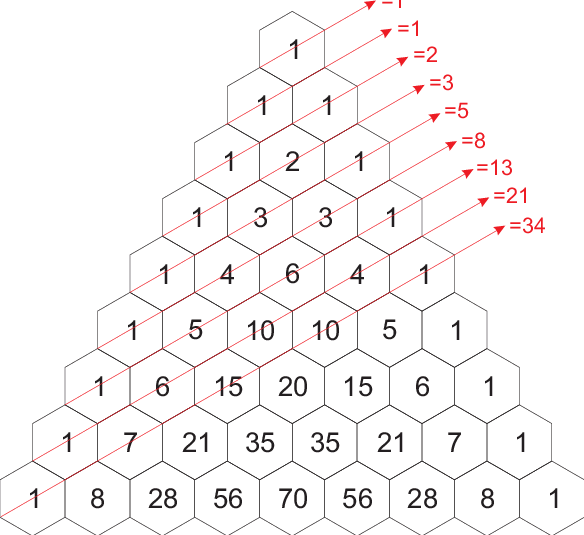

In [912]:
from IPython.display import Image
url = "https://raw.githubusercontent.com/gawron/python-for-social-science/refs/heads/master/intro/pascal.png"
#img = Image("pascal.png")
img = Image(url)
img

## Completely optional  appendix exercise

1.  The function `make_pascals_triangle` defined above gives you a working Pascal's triangle and the examples show how to use it.  Write a function `fib_n_from_pascal` that takes two arguments, `n` and a Pascal's Triangle of the sort produced by `make_pascals_triangle`; `fib_n_from_pascal` should return the $n$-th Fibonacci number (so `fib_n_from_pascal(n)` should equal `fibonacci_seq_n (n)`) and it should compute it by doing the correct diagonal sum in Pascal's triangle.  Once you have defined `fib_n_from_pascal`, the code snippet in the cell below should work.
2.  You know that the numbers in Pascal's Triangle are the coefficients in the Binomial Theorem. Modify  `fib_n_from_pascal` to eliminate its dependence on a precomputed Pascal's triangle table. Call the modified function   `fib_n_from_binomial`.  It should have a single parameter `n`.  Instead of summing entries in Pascal's triangular table it will sum appropriate binomial coefficients.  Note: if you have done part (a) of this problem, this should be a very small modification.  It is particularly small if you import a standard Python module that provides a function that computes binomial coefficients (it is not, however, named `compute_binomial_coeffient` or anything quite so transparent).  If not, refresh your memory of the Binomial theorem (Google it, I mean), which will tell you another way to compute the numbers in Pascal's Triangle.   Test it in an appropriately m,odified version of the code cell below.
3.  This is far from the easiest way to compute the $n$-th Fibonacci number. The closed form is, but it does avoid floating point issues and it sums n/2 numbers instead of n. So, probably no Nobel Prize in CS.  But this is fun.

In [608]:
m=20
# SHd produce same output as previous cell
rows = make_pascals_triangle(m)
# Makes no diff if rows has more than enough rows
#rows = make_pascals_triangle(m+5)
for n in range(1,m+1):
    print(f"{n:>2}   {fib_n_from_pascal (rows,n):>4}")

 1      1
 2      1
 3      2
 4      3
 5      5
 6      8
 7     13
 8     21
 9     34
10     55
11     89
12    144
13    233
14    377
15    610
16    987
17   1597
18   2584
19   4181
20   6765


In [602]:
m=20
# SHd produce same output as previous cell
for n in range(1,m+1):
    print(f"{n:>2}   {fibonacci_seq_n (n):>4}")


 1      1
 2      1
 3      2
 4      3
 5      5
 6      8
 7     13
 8     21
 9     34
10     55
11     89
12    144
13    233
14    377
15    610
16    987
17   1597
18   2584
19   4181
20   6765


In [566]:
m=20
# SHd produce same output as previous two cells
for n in range(m+1):
    print(f"{n:>2}   {fib_n_from_binomial (n):>3}")

 0     0
 1     1
 2     1
 3     2
 4     3
 5     5
 6     8
 7    13
 8    21
 9    34
10    55
11    89
12   144
13   233
14   377
15   610
16   987
17   1597
18   2584
19   4181
20   6765


In [607]:
import math

def fib_n_from_pascal (pt,m):
    """
    pt is a pascals triangle, n is an integer.
    
    Return the nth Fiobonacci number.
    """
    n=m-1
    # Need to count down from different starting points for odds and evens
    parity_bit = m%2
    return sum(pt[r][n-r] for r in range(n+parity_bit,n//2,-1))


def fib_n_from_pascal_alt (pt,m):
    """
    pt is a pascals triangle, n is an integer.
    
    Return the nth Fiobonacci number.
    """
    n=m-1
    r,tot=n,0
    while n-r<=r:
        tot += pt[r][n-r]
        r-=1
    return tot


def fib_n_from_binomial_alt(n):
    """
    This is the correct, more complicated version with no m,.n offset
    n is an integer.
    
    Return the nth Fiobonacci number.
    """
    r, tot = n-1,0
    while n-(r+1) <= r:
        tot += math.comb(r,(n-(r+1)))
        #print(n-r,r,math.comb(r,n-r), tot)
        r-=1
    return tot

def fib_n_from_binomial_minor_alt(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    #  Consistency with other fib fns requires
    #  fib_n_from_binomial(12) = 144 (not 233)
    n=m-1
    r, tot = n,0
    while n-r <= r:
        tot += math.comb(r,(n-r))
        #print(n-r,r,math.comb(r,n-r), tot)
        r-=1
    return tot

def fib_n_from_binomialx(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    #  Consistency with other fib fns requires
    #  fib_n_from_binomial(12) = 144 (not 233)
    n=m-1
    #rather than : r, tot = n//2,1
    # round up when n is odd
    r, tot = round(n/2),0
    while r <= n:
        tot += math.comb(r,n-r)
        #print(r,n-r,math.comb(r,n-r), tot)
        r+=1
    return tot

def fib_n_from_binomial(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    n=m-1
    return sum(math.comb(x,n-x) for x in range(round(n/2),n+1))

#### Final comments

$$
\text{Moe's Theorem}\\
\text{F}_{n+1} = \sum_{r=\lceil n/2 \rceil}^{n} {r \choose n-r} = \frac{-1}{\sqrt{5}}\left (\phi^{n+1} - (-\phi^{-1})^{n+1} \right)
$$

Notation note:  The expression $\lceil x \rceil$ denotes the smallest integer greater or equal to $x$, so for
example, $\lceil 11/2 \rceil$ is 6.

The truth of Moe's Theorem (Moe of Cretonia, 470 B.C.) should now be obvious.

###  Proof that $\text{A}^{m}v$ converges on the first eigenvector


$$
v_{m}  = A^{m}v_{0}
$$

Now whatever $v_{0}$ is, linear algebra tells us we can
write $v_{0}$ as a linear combination of the eigenvectors  $e_{i}$ of A:

$$
v_{0} = \sum_{i} c_{i} e_{i},
$$

for appropriate choice of the $c_{i}$. Then 

$$
v_{m} = A^{m} \sum_{i} c_{i} e_{i} =  \sum_{i} c_{i} \kappa_{i}^{m}  e_{i} = \kappa_{1}^{m} \sum_{i} c_{i} \left \lbrack \frac{\kappa_{i}}{\kappa_{1}}\right \rbrack^{m} e_{i} 
$$

where $\kappa_{1}$ is the leading or largest eigenvalue and
we have made use of the fact that if $\kappa$ is
an eigenvalue of A, then $\kappa^{m}$ is an eigenvalue
of  $\text{A}^{m}$.   Then, since $\kappa_{i}/\kappa_{1} < 1$ whenever $i\neq 1$,
all the $i\neq 1$ terms will tend toward 0.  Then

$$
\lim_{m \to \infty} v_{m} = A^{𝑚} v_{0} = \kappa_{1}^{m} c_{1} \left \lbrack \frac{\kappa_{1}}{\kappa_{1}}\right \rbrack^{m} v_{1} 
= \kappa_{1}^{m} c_{1} e_{1} 
$$

That is, applying $A^{m}$ to **any** vector converges on a vector proportional to $e_{1}$, the first eigenvector of A. The significance of that is that any vector proportional to a first eigenvector $v_{1}$ is still a first eigenvector, that is, it is in the same
**eigenspace**, so we will get a vector that is a first eigenvector.  Using the eigenvector
we can always easily find the eigenvalue.

## When $\phi^{n} + \phi^{-n}$  and $\phi^{n} - \phi^{-n}$ are integers

Somewhat surprisingly $\phi^{n} + \phi^{-n}$ is often an integer and if it
isn't $\phi^{n} - \phi^{-n}$ is.    How often does each happen?
Well, it's fairly easy to show for the case of $n=2$.  Recall from the discussion
above that:

$$
\begin{array}{lcl}
\sqrt{5} &= &\phi + \frac{1}{\phi}
\end{array}
$$

From this it immediately follows that


$$
\begin{array}{lcl}
5 & = & \left ( \phi + \frac{1}{\phi} \right ) ^2\\
  & = & \phi^{2} + 2 + \frac{1}{\phi^2}\\
3 & = &  \phi^{2} + \frac{1}{\phi^2}
\end{array}
$$

In fact, using facts B and C above it's easy to show that
$\phi^{n} + \phi^{-n}$ is an integer for all even $n$.  In fact,
for even $n$:


$$
\phi^{n} + \phi^{-n} = F_{n-1} + F_{n+1}
$$

Since $F_{n-1}$ and $F_{n+1}$ are not adjacent, the value is is not generally a Fibonacci number.

For example:

In [852]:
tol = 1e-6
print(" i    n                  F_n-1    F_n+1       Python",end="\n\n")
for n in range(2,32,2):
    s = phi**(n) + phi**(-n)
    t = fibonacci_seq_n(n-1) + fibonacci_seq_n(n+1)
    lb,ub = fibonacci_seq_n(n-1),fibonacci_seq_n(n+1)
    print(f"{n//2:>2}   {n:>2}      {t:>7.0f} {lb:>8} {ub:>8}    {s:<16.15f}")

 i    n                  F_n-1    F_n+1       Python

 1    2            3        1        2    3.000000000000000
 2    4            7        2        5    7.000000000000001
 3    6           18        5       13    18.000000000000004
 4    8           47       13       34    47.000000000000014
 5   10          123       34       89    123.000000000000043
 6   12          322       89      233    322.000000000000171
 7   14          843      233      610    843.000000000000341
 8   16         2207      610     1597    2207.000000000001364
 9   18         5778     1597     4181    5778.000000000003638
10   20        15127     4181    10946    15127.000000000009095
11   22        39603    10946    28657    39603.000000000029104
12   24       103682    28657    75025    103682.000000000087311
13   26       271443    75025   196418    271443.000000000232831
14   28       710647   196418   514229    710647.000000000582077
15   30      1860498   514229  1346269    1860498.000000002095476


where the second column is $n$, 
the power we're raising to, the third is $\phi^{n} + \phi^{-n}$,
the fifth and sixth are the nonadjacent Fibonacci numbers  
we add to compute $\phi^{n} + \phi^{-n}$, and
where the decimal with many 0s in the last column
is what Python actually returns for the computation.  You
can see the computational error grow as $n$ grows larger.

To prove the claim:

$$
\begin{array}{llcll}
(a)&     & &           \phi^{n} + \phi^{-n} \\ 
(b)&     &=&            F_{n}\phi + F_{n-1} + (-1)^{n+1} \lbrack F_{n}\phi - F_{n+1}\rbrack \\        
\end{array}
$$

where step (b) applies facts B and C demonstrated in the previous section:

So when $n$ is even $(-1)^{n+1}$ becomes a minus sign and we have 
$$
\begin{array}{llcll}
(c)&                 &=&    F_{n}\phi + F_{n-1} - ( F_{n}\phi - F_{n+1}) \\  
(d) &                 &=&    F_{n}\phi + F_{n-1} -  F_{n}\phi + F_{n+1} \\  
(e) &                 &=&    F_{n-1}  + F_{n+1} \\  
\end{array}
$$

which is an integer.  If $n$ is odd the $\phi$  terms do not cancel.  

By completely parallel reasoning,


$$
\phi^{n} - \phi^{-n} = F_{n-1} + F_{n+1}
$$

for odd values of $n$.  The demonstration is left as an exercise.  Inspecting 
$\phi^{n} - \phi^{-n}$ for some odd $n$:

In [854]:
tol = 1e-6
print(" i    n                  F_n-1    F_n+1       Python",end="\n\n")
for n in range(3,33,2):
    s = phi**(n) - phi**(-n)
    t = fibonacci_seq_n(n-1) + fibonacci_seq_n(n+1)
    lb,ub = fibonacci_seq_n(n-1),fibonacci_seq_n(n+1)
    print(f"{n//2:>2}   {n:>2}      {t:>7.0f} {lb:>8} {ub:>8}    {s:<16.15f}")

 i    n                  F_n-1    F_n+1       Python

 1    3            4        1        3    4.000000000000000
 2    5           11        3        8    11.000000000000002
 3    7           29        8       21    29.000000000000007
 4    9           76       21       55    76.000000000000028
 5   11          199       55      144    199.000000000000057
 6   13          521      144      377    521.000000000000227
 7   15         1364      377      987    1364.000000000000682
 8   17         3571      987     2584    3571.000000000002274
 9   19         9349     2584     6765    9349.000000000005457
10   21        24476     6765    17711    24476.000000000014552
11   23        64079    17711    46368    64079.000000000050932
12   25       167761    46368   121393    167761.000000000116415
13   27       439204   121393   317811    439204.000000000407454
14   29      1149851   317811   832040    1149851.000000001164153
15   31      3010349   832040  2178309    3010349.000000003259629


Combining the previous two code cells to  show that one or the other $\phi^n + \phi^{-n}$ or  $\phi^n - \phi^{-n}$ will always be an integer.

In [910]:
tol = 1e-6
print(" n    phi^n + phi^-n      phi^n - phi^-n   ",end="\n\n")
for n in range(1,32):
    s = phi**(n) + phi**(-n)
    t = phi**(n) - phi**(-n)
    print(f"{n:>2}  {s:>13.5f}        {t:>13.5f}")

 n    phi^n + phi^-n      phi^n - phi^-n   

 1        2.23607              1.00000
 2        3.00000              2.23607
 3        4.47214              4.00000
 4        7.00000              6.70820
 5       11.18034             11.00000
 6       18.00000             17.88854
 7       29.06888             29.00000
 8       47.00000             46.95743
 9       76.02631             76.00000
10      123.00000            122.98374
11      199.01005            199.00000
12      322.00000            321.99379
13      521.00384            521.00000
14      843.00000            842.99763
15     1364.00147           1364.00000
16     2207.00000           2206.99909
17     3571.00056           3571.00000
18     5778.00000           5777.99965
19     9349.00021           9349.00000
20    15127.00000          15126.99987
21    24476.00008          24476.00000
22    39603.00000          39602.99995
23    64079.00003          64079.00000
24   103682.00000         103681.99998
25   167761.00001  

Something interesting happens. In the last few printouts it looks as if both are integers. In fact
only one is, but the contribution made by the $\phi^{-1}$ term is growing smaller and smaller
and so $\phi^n + \phi^{-n}$ and $\phi^n - \phi^{-n}$ are growing closer together, too close for
the level of precision we are using to distinguish.

Thiese considerations also explain why values of $\phi^{n}$ grow closer to an integer as 
$n$ increases, a puzzle considered on [Judith Knott's post](https://judithknott.com/2017/09/13/powers-of-the-golden-ratio/) on powers of the golden ratio.  For integer values of $n$, one of $\phi^n + \phi^{-n}$ or $\phi^n - \phi^{-n}$ will always be an integer, but as $n$ increases the contribution of $\phi^{-n}$ grows rapidly smaller, and $\phi^n + \phi^{-n}$ and $\phi^n - \phi^{-n}$ simultaneously grow closer to $\phi^{n}$, so necessarily
$\phi^n$ grows closer to an integer.